### we have regions that CAGA motf of GC-SBE motif binds
1. We find which regions are binding to both those regions ( from motif instances, last column)
2. Then we get the sequences of these commonly bound regions
3. Fianlly, we find the distances between the motfs

In [1]:
library("IRdisplay")
library(GenomicRanges)

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The follow

## GC-motif

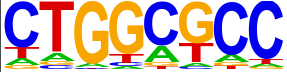

In [3]:
display_png(file='/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/motif5.png')

In [10]:
names_list = c("ID","Chr","Start","End","Strand","Peak Score","Focus Ratio/Region Size","Annotation","Detailed Annotation","Distance to TSS","Nearest PromoterID","Entrez ID","Nearest Unigene","Nearest Refseq","Nearest Ensembl","Gene Name","Gene Alias","Gene Description","Gene Type","CpG%","GC%","hit"
)

In [11]:
# get the motif occurances
GCmotif_instances = read.table("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/instancesOfSpecificMotifs/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif5_200.txt", sep = "\t", header = F, quote="\"")#quote="\"*")
colnames(GCmotif_instances) = names_list
head(GCmotif_instances)



,ID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,⋯,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,CpG%,GC%,hit
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<chr>,<lgl>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,chr1_101376595_101376996_S1PR1,chr1,101376696,101376896,+,0,NA,"intron (ENST00000444327.1, intron 1 of 1)",NA,26747,⋯,,,,,,,,0.010,0.383085,
2,chr2_140988684_140989085_LRP1B,chr2,140988785,140988985,+,0,NA,"intron (ENST00000434794.1, intron 2 of 13)",NA,-3658,⋯,,,,,,,,0.000,0.288557,
3,chr12_108668571_108668972_SELPLG,chr12,108668672,108668872,+,0,NA,TTS (ENST00000459456.1),NA,324,⋯,,,,,,,,0.000,0.333333,
4,chr22_28714156_28714557_HSCB,chr22,28714257,28714457,+,0,NA,"intron (ENST00000439346.5, intron 2 of 5)",NA,-1862,⋯,,,,,,,,0.005,0.407960,"77(CTGTCGCC,+,0.00)"
5,chr6_126015807_126016208_TRMT11,chr6,126015908,126016108,+,0,NA,"intron (ENST00000648977.1, intron 13 of 22)",NA,9166,⋯,,,,,,,,0.005,0.373134,
6,chr12_77957053_77957454_NAV3,chr12,77957154,77957354,+,0,NA,"intron (ENST00000550042.2, intron 4 of 8)",NA,-9022,⋯,,,,,,,,0.000,0.333333,"-48(CTGTCTCC,+,0.00)"


In [12]:
# select the columns which actually has a hit
GCmotif_instances_hits = GCmotif_instances[GCmotif_instances$hit!='',]
rownames(GCmotif_instances_hits) <- 1:nrow(GCmotif_instances_hits)
head(GCmotif_instances_hits)

,ID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,⋯,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,CpG%,GC%,hit
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<chr>,<lgl>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,chr22_28714156_28714557_HSCB,chr22,28714257,28714457,+,0,NA,"intron (ENST00000439346.5, intron 2 of 5)",NA,-1862,⋯,,,,,,,,0.005,0.407960,"77(CTGTCGCC,+,0.00)"
2,chr12_77957053_77957454_NAV3,chr12,77957154,77957354,+,0,NA,"intron (ENST00000550042.2, intron 4 of 8)",NA,-9022,⋯,,,,,,,,0.000,0.333333,"-48(CTGTCTCC,+,0.00)"
3,chrX_37457403_37457804_NA,chrX,37457504,37457704,+,0,NA,TTS (ENST00000378628.8),NA,16081,⋯,,,,,,,,0.005,0.412935,"18(GGAGCCTG,-,0.00)"
4,chr8_119193733_119194134_MAL2,chr8,119193834,119194034,+,0,NA,"intron (ENST00000522112.6, intron 2 of 4)",NA,-14015,⋯,,,,,,,,0.005,0.412935,"21(TTGGCTCC,+,0.00),23(GGCTCCAA,-,0.00)"
5,chr2_96146942_96147343_DUSP2,chr2,96147043,96147243,+,0,NA,promoter-TSS (ENST00000449242.1),NA,-131,⋯,,,,,,,,0.015,0.572139,"-100(GGCTCCAA,-,0.00)"
6,chr12_26640717_26641118_ITPR2,chr12,26640818,26641018,+,0,NA,"intron (ENST00000381340.7, intron 21 of 56)",NA,-10204,⋯,,,,,,,,0.010,0.402985,"4(GGAGACAG,-,0.00)"


In [13]:
GCmotif_instances_gr = makeGRangesFromDataFrame(GCmotif_instances_hits,                         
                         keep.extra.columns=T,
                        ignore.strand=T,
                         seqinfo=NULL,
                         seqnames.field='Chr',
                         start.field="Start",
                         end.field="End",
                         #strand.field="strand",
                         starts.in.df.are.0based=FALSE)
GCmotif_instances_gr

GRanges object with 81 ranges and 19 metadata columns:
       seqnames              ranges strand |                     ID      Strand
          <Rle>           <IRanges>  <Rle> |            <character> <character>
   [1]    chr22   28714257-28714457      * | chr22_28714156_28714..           +
   [2]    chr12   77957154-77957354      * | chr12_77957053_77957..           +
   [3]     chrX   37457504-37457704      * | chrX_37457403_374578..           +
   [4]     chr8 119193834-119194034      * | chr8_119193733_11919..           +
   [5]     chr2   96147043-96147243      * | chr2_96146942_961473..           +
   ...      ...                 ...    ... .                    ...         ...
  [77]     chr8   56175202-56175402      * | chr8_56175101_561755..           +
  [78]     chr7   86942180-86942380      * | chr7_86942079_869424..           +
  [79]    chr15   66631055-66631255      * | chr15_66630954_66631..           +
  [80]    chr19   46951436-46951636      * | chr19_46951335_46951

## CAGA-motf

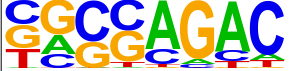

In [8]:
display_png(file='/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/motif6.png')

In [15]:
CAGAmotif_instances = read.table("/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/instancesOfSpecificMotifs/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif6_200.txt", sep = "\t", header = F)
colnames(CAGAmotif_instances) = names_list
head(CAGAmotif_instances)

,ID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,⋯,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,CpG%,GC%,hit
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<chr>,<lgl>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,chr1_101376595_101376996_S1PR1,chr1,101376696,101376896,+,0,NA,"intron (ENST00000444327.1, intron 1 of 1)",NA,26747,⋯,,,,,,,,0.010,0.383085,"76(GTCTGGTC,-,0.00)"
2,chr2_140988684_140989085_LRP1B,chr2,140988785,140988985,+,0,NA,"intron (ENST00000434794.1, intron 2 of 13)",NA,-3658,⋯,,,,,,,,0.000,0.288557,
3,chr12_108668571_108668972_SELPLG,chr12,108668672,108668872,+,0,NA,TTS (ENST00000459456.1),NA,324,⋯,,,,,,,,0.000,0.333333,"-69(TCCCAGAC,+,0.00)"
4,chr22_28714156_28714557_HSCB,chr22,28714257,28714457,+,0,NA,"intron (ENST00000439346.5, intron 2 of 5)",NA,-1862,⋯,,,,,,,,0.005,0.407960,"79(GTCGCCCA,-,0.00)"
5,chr6_126015807_126016208_TRMT11,chr6,126015908,126016108,+,0,NA,"intron (ENST00000648977.1, intron 13 of 22)",NA,9166,⋯,,,,,,,,0.005,0.373134,"-19(GTCTGGTC,-,0.00)"
6,chr12_77957053_77957454_NAV3,chr12,77957154,77957354,+,0,NA,"intron (ENST00000550042.2, intron 4 of 8)",NA,-9022,⋯,,,,,,,,0.000,0.333333,"-46(GTCTCCTC,-,0.00)"


In [16]:
# select the columns which actually has a hit
CAGAmotif_instances_hits = CAGAmotif_instances[CAGAmotif_instances$hit!='',]
rownames(CAGAmotif_instances_hits) <- 1:nrow(CAGAmotif_instances_hits)
head(CAGAmotif_instances_hits)

,ID,Chr,Start,End,Strand,Peak Score,Focus Ratio/Region Size,Annotation,Detailed Annotation,Distance to TSS,⋯,Nearest Unigene,Nearest Refseq,Nearest Ensembl,Gene Name,Gene Alias,Gene Description,Gene Type,CpG%,GC%,hit
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<lgl>,<chr>,<lgl>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,chr1_101376595_101376996_S1PR1,chr1,101376696,101376896,+,0,NA,"intron (ENST00000444327.1, intron 1 of 1)",NA,26747,⋯,,,,,,,,0.010,0.383085,"76(GTCTGGTC,-,0.00)"
2,chr12_108668571_108668972_SELPLG,chr12,108668672,108668872,+,0,NA,TTS (ENST00000459456.1),NA,324,⋯,,,,,,,,0.000,0.333333,"-69(TCCCAGAC,+,0.00)"
3,chr22_28714156_28714557_HSCB,chr22,28714257,28714457,+,0,NA,"intron (ENST00000439346.5, intron 2 of 5)",NA,-1862,⋯,,,,,,,,0.005,0.407960,"79(GTCGCCCA,-,0.00)"
4,chr6_126015807_126016208_TRMT11,chr6,126015908,126016108,+,0,NA,"intron (ENST00000648977.1, intron 13 of 22)",NA,9166,⋯,,,,,,,,0.005,0.373134,"-19(GTCTGGTC,-,0.00)"
5,chr12_77957053_77957454_NAV3,chr12,77957154,77957354,+,0,NA,"intron (ENST00000550042.2, intron 4 of 8)",NA,-9022,⋯,,,,,,,,0.000,0.333333,"-46(GTCTCCTC,-,0.00)"
6,chr8_119193733_119194134_MAL2,chr8,119193834,119194034,+,0,NA,"intron (ENST00000522112.6, intron 2 of 4)",NA,-14015,⋯,,,,,,,,0.005,0.412935,"11(TGGCAGAC,+,0.00)"


In [17]:
CAGAmotif_instances_gr = makeGRangesFromDataFrame(CAGAmotif_instances_hits,                         
                         keep.extra.columns=T,
                        ignore.strand=T,
                         seqinfo=NULL,
                         seqnames.field=c("Chr"),
                         start.field="Start",
                         end.field=c("End"),
                         #strand.field="strand",
                         starts.in.df.are.0based=FALSE)
CAGAmotif_instances_gr

GRanges object with 113 ranges and 19 metadata columns:
        seqnames              ranges strand |                     ID
           <Rle>           <IRanges>  <Rle> |            <character>
    [1]     chr1 101376696-101376896      * | chr1_101376595_10137..
    [2]    chr12 108668672-108668872      * | chr12_108668571_1086..
    [3]    chr22   28714257-28714457      * | chr22_28714156_28714..
    [4]     chr6 126015908-126016108      * | chr6_126015807_12601..
    [5]    chr12   77957154-77957354      * | chr12_77957053_77957..
    ...      ...                 ...    ... .                    ...
  [109]    chr18   49062248-49062448      * | chr18_49062147_49062..
  [110]     chr8   56175202-56175402      * | chr8_56175101_561755..
  [111]     chr5 108902318-108902518      * | chr5_108902217_10890..
  [112]    chr15   66631055-66631255      * | chr15_66630954_66631..
  [113]    chr18   27847533-27847733      * | chr18_27847432_27847..
             Strand Peak Score Focus Ratio/Regi

### find the overlap between motif instances

In [18]:
length(intersect(GCmotif_instances_hits$ID, CAGAmotif_instances_hits$ID))

[1] 38

In [19]:
common_regions = subsetByOverlaps(GCmotif_instances_gr, CAGAmotif_instances_gr)

Warning message in .Seqinfo.mergexy(x, y):
“Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chr19
  - in 'y': chr16
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning).”


In [20]:
(common_regions$ID)

[1] "chr22_28714156_28714557_HSCB"      "chr12_77957053_77957454_NAV3"     
 [3] "chr8_119193733_119194134_MAL2"     "chr2_96146942_96147343_DUSP2"     
 [5] "chr12_26640717_26641118_ITPR2"     "chr2_173249848_173250249_CDCA7"   
 [7] "chr2_223122694_223123095_KCNE4"    "chr10_110144909_110145310_MXI1"   
 [9] "chr12_71006945_71007346_PTPRR"     "chr4_133657880_133658281_PCDH10"  
[11] "chr11_86473998_86474399_CCDC81"    "chr4_80126786_80127187_ANTXR2"    
[13] "chr18_45156668_45157069_SLC14A2"   "chr7_10227505_10227906_NDUFA4"    
[15] "chr1_208836969_208837370_PLXNA2"   "chr3_63927668_63928069_ATXN7"     
[17] "chr7_80298235_80298636_CD36"       "chr5_131177159_131177560_HINT1"   
[19] "chr3_174094618_174095019_NAALADL2" "chr10_78656730_78657131_ZMIZ1"    
[21] "chr11_124302723_124303124_OR8D1"   "chr11_103322842_103323243_DYNC2H1"
[23] "chr3_64361418_64361819_PRICKLE2"   "chr18_49524387_49524788_RPL17"    
[25] "chr12_14834004_14834405_ART4"      "chr5_74625726_74626127_HEXB"      
[27] "chr18_40925253_40925654_PIK3C3"    "chr3_64352174_64352575_PRICKLE2"  
[29] "chr6_134512930_134513331_SGK1"     "chr7_66789651_66790052_RABGEF1"   
[31] "chr6_125667521_125667922_HEY2"     "chr5_56282287_56282688_ANKRD55"   
[33] "chr4_109820567_109820968_GAR1"     "chr15_66711490_66711891_SMAD6"    
[35] "chr15_36333975_36334376_CDIN1"     "chr8_56175101_56175502_PLAG1"     
[37] "chr15_66630954_66631355_LCTL"      "chr18_27847432_27847833_CDH2"

## create a bed file from the common regions

In [21]:
common_regions

GRanges object with 38 ranges and 19 metadata columns:
       seqnames              ranges strand |                     ID      Strand
          <Rle>           <IRanges>  <Rle> |            <character> <character>
   [1]    chr22   28714257-28714457      * | chr22_28714156_28714..           +
   [2]    chr12   77957154-77957354      * | chr12_77957053_77957..           +
   [3]     chr8 119193834-119194034      * | chr8_119193733_11919..           +
   [4]     chr2   96147043-96147243      * | chr2_96146942_961473..           +
   [5]    chr12   26640818-26641018      * | chr12_26640717_26641..           +
   ...      ...                 ...    ... .                    ...         ...
  [34]    chr15   66711591-66711791      * | chr15_66711490_66711..           +
  [35]    chr15   36334076-36334276      * | chr15_36333975_36334..           +
  [36]     chr8   56175202-56175402      * | chr8_56175101_561755..           +
  [37]    chr15   66631055-66631255      * | chr15_66630954_66631

In [22]:

write.table(GCmotif_instances_gr, file="/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif5_GCmotif_hits_200.bed", quote=F, sep="\t", row.names=F, col.names=F)


In [23]:
write.table(CAGAmotif_instances_gr, file="/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif6_caga_hits_200.bed", quote=F, sep="\t", row.names=F, col.names=F)


In [24]:
write.table(common_regions, file="/project/Mechanogenomics_data/ATACseq_analysis/MotifEnrichment/distancesBtwMotifs/stat_bmp9_VS_stat_cont_FC_biger_1.5_motif5_6_hits_200.bed", quote=F, sep="\t", row.names=F, col.names=F)
